# Sobel Example
### This version considers the 2<sup>nd</sup> order derivatives and zero-crossing 
### Amir - 2023

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# function to keep the valid part after convolution 
# just in case , if we need it
#
def am_valid_part(a,N):
    cff = int(N/2)
    M = a.shape
    if len(M)==3:
        return a[cff:M[0]-cff, cff:M[1]-cff, :]
    else:
        return a[cff:M[0]-cff, cff:M[1]-cff]

In [3]:
# reading the image
image = cv2.imread('..\\20220801_183844.jpg')

# thr decides edges that we wanna keep in the final output. edges stronger than thr*maximum_strength would be kept. 
# e.g., thr = 0.7, edgest with strength higher than 0.7*maximum_strength would be kept
thr = 0.3
if image is None:
    print('Could not read image') 
    
# convert it to gray level and define the 2nd order HP filter kernels 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsx = np.array([[-1 , 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]])
hsy = np.array([[-1 , -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]])


In [4]:
# again just in case, we may prefer to apply a Gaussian LP filter to limit the image band
# and decrease the effects of local variations

ans1 = input('Apply a low pass filter?')
if (ans1=='y' or ans1=='Y'):
    hlp = np.array([[1 , 2 , 1] , [2 , 4 , 2] , [1 , 2 , 1]] ) / 16 
    image = cv2.filter2D(src=image, ddepth=-1, kernel=hlp)
    

Apply a low pass filter?n


In [5]:
## how to use?
## cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) ->	dst


In [6]:
# horizontal and vertical edge detection
Gx = cv2.filter2D(src=image, ddepth=-1, kernel=hsx)
Gy = cv2.filter2D(src=image, ddepth=-1, kernel=hsy)
Gx = am_valid_part(Gx,3)
Gy = am_valid_part(Gy,3)

# showing the results
cv2.namedWindow("Original", cv2.WINDOW_NORMAL)
cv2.imshow('Original', image)
cv2.namedWindow("Gx", cv2.WINDOW_NORMAL)
cv2.imshow('Gx', Gx)
cv2.namedWindow("Gy", cv2.WINDOW_NORMAL)
cv2.imshow('Gy', Gy)
cv2.waitKey()


32

In [7]:
Gxy = (Gx + Gy) / 2.0 + 0.001 
Gdir = np.arctan(np.divide(Gy,(Gx+0.000001))) 
h8 = np.array([[-1 , -1 , -1] , [-1 , 8 , -1] , [-1 , -1 , -1]])
Gxy2 = cv2.filter2D(src=Gxy, ddepth=-1, kernel=h8)
Gxy2 = np.abs( Gxy2)

In [8]:

cv2.namedWindow("GABS", cv2.WINDOW_NORMAL)
cv2.imshow('GABS', np.uint8(Gxy2))

In [9]:
M=Gxy2.shape
print(Gxy2)

[[3.30000000e+01 1.00000000e+00 7.50000000e+00 ... 0.00000000e+00
  2.45000000e+01 3.40000000e+01]
 [3.40000000e+01 4.65000000e+01 7.50000000e+00 ... 2.50000000e+00
  2.70000000e+01 5.15000000e+01]
 [2.45000000e+01 8.50000000e+00 1.50000000e+01 ... 2.90000000e+01
  3.85000000e+01 6.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e+00 4.50000000e+00 ... 1.45000000e+01
  1.35000000e+01 9.50000000e+00]
 [1.00000000e+00 8.50000000e+00 1.77635684e-15 ... 4.10000000e+01
  6.00000000e+00 2.90000000e+01]
 [1.00000000e+00 5.00000000e+00 6.50000000e+00 ... 6.00000000e+00
  1.95000000e+01 6.60000000e+01]]


In [10]:
print(Gdir)

[[0.24497863 0.         0.         ... 0.         0.         0.        ]
 [1.3258176  0.88506676 1.57079613 ... 0.         0.         0.        ]
 [0.32175045 0.19739552 1.57079599 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.14189704 1.57079626]
 [0.         0.         0.         ... 0.28605143 0.39060702 1.57079623]
 [0.         1.57079533 0.46364751 ... 0.32175054 0.40489176 1.57079599]]


In [11]:
# applyiing a threshold on the edge strength matrix, using the thr parameter and the maximum strength of edges
thr = np.max(Gxy2) * thr
abs_thr = (Gxy2 >= thr)
print(abs_thr)
Gabs2 = np.multiply( Gxy2 , np.uint8(abs_thr)) 


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [12]:
print(Gabs2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
print('Number of pixels left on strong edges=', np.sum(abs_thr))
# showing the outcome as a binary image
abs_thr= np.uint8(abs_thr * 200)
cv2.namedWindow("edges threshold", cv2.WINDOW_NORMAL)
cv2.imshow('edges threshold', abs_thr)
cv2.namedWindow("edges thr mul", cv2.WINDOW_NORMAL)
cv2.imshow('edges thr mul', Gabs2)


Number of pixels left on strong edges= 166740


In [14]:
cv2.waitKey()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Edges after Thresholding')

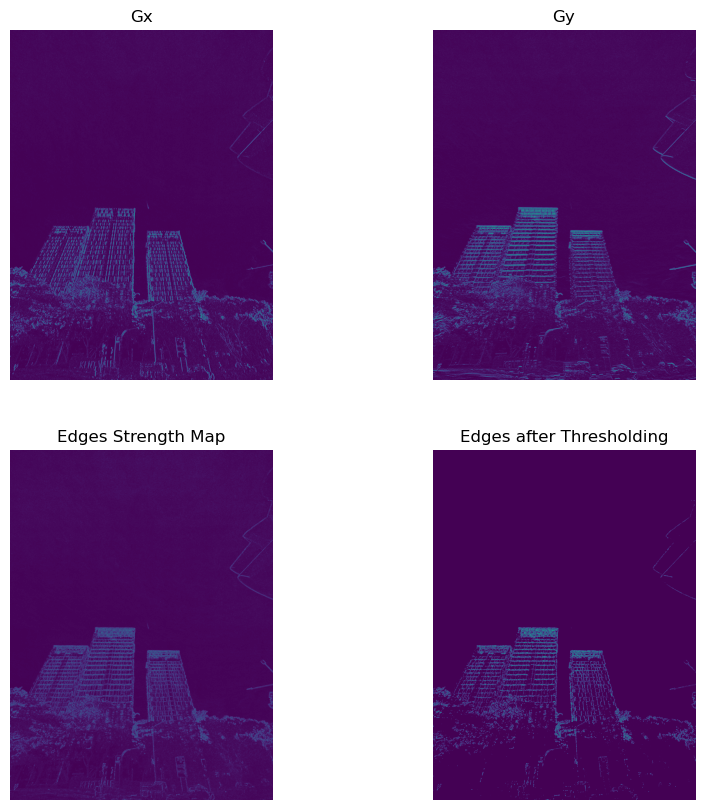

In [15]:
# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Gx)
plt.axis('off')
plt.title("Gx")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Gy)
plt.axis('off')
plt.title("Gy")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Gxy2)
plt.axis('off')
plt.title("Edges Strength Map")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# showing image
plt.imshow(abs_thr)
plt.axis('off')
plt.title("Edges after Thresholding")
